<div style="padding:20px; 
            color:#cc7e08;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:#403b34;
            background-color:#2b2924;
            font-family:newtimeroman;
            overflow:hidden;
            font-weight:500">SOLAR PANEL ANALYSIS </div>

<center>
<img src="https://github.com/DorobantuDiana/DS_Projects/blob/main/objects/solar_power.gif?raw=true" width=850>
</center>

<div style="border-radius:20px;
            border : black solid;
            color: #403b34;
            background-color: #cc7e08;
            font-size:100%;
            text-align: left;
            margin-left: 10px;
            margin-right: 10px;">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:#2b2924'><center> 
    </br> Data Science of Photovoltaic System
</center></h2>  
    
* <b>solar panels</b>, also known as <i>photovoltaic (PV) panels</i>, are devices that <u>convert sunlight into electricity</u> using the photovoltaic effect; they play a crucial role in the <i>renewable energy sector</i>, providing a clean and sustainable source of power; solar panels have gained significant popularity due to their environmental benefits, potential cost savings and increasing energy demands.

* by leveraging <b>data science</b> techniques, solar panel projects can benefit from improved <b><i>energy forecasting</i></b>, optimized <b><i>system performance</i></b>, early <b><i>fault detection</i></b> and efficient <b><i>energy distribution</i></b>; these data-driven insights can enhance the solar energy system's:

<ol style="margin-left:360px">
    <li><b>overall efficiency</b> </li>
    <li><b>reliability</b></li>
    <li><b>cost-effectiveness</b> </li>
</ol>

---
<br>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2b2924;font-family:newtimeroman;color:#cc7e08;font-size:160%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   

1. [Dataset](#1)
    
2. [Libraries](#2)
   
3. [Data Loading](#3)
    
4. [EDA](#4)
    
5. [System Performance Analysis](#5) 
     
<br>  
    
---

<a id="1"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2b2924;font-family:newtimeroman;color:#cc7e08;font-size:160%;text-align:center;border-radius:10px 10px;">Dataset</p> 
    
    
More information about the dataset you can find [here](https://www.kaggle.com/datasets/anikannal/solar-power-generation-data?datasetId=836676&sortBy=voteCount).

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2b2924;font-family:newtimeroman;color:#cc7e08;font-size:160%;text-align:center;border-radius:10px 10px;">Libraries</p> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

<a id="3"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2b2924;font-family:newtimeroman;color:#cc7e08;font-size:160%;text-align:center;border-radius:10px 10px;">Data Loading</p> 

In [2]:
# power generation datasets
g1 = pd.read_csv("/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv")
g1.head()
g2 = pd.read_csv("/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv")
g2.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [3]:
# sensor datasets
s1 = pd.read_csv("/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv")
s1.head()
s2 = pd.read_csv("/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv")
s2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


<a id="4"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2b2924;font-family:newtimeroman;color:#cc7e08;font-size:160%;text-align:center;border-radius:10px 10px;">EDA</p> 

In [4]:
# power generation datasets
def check(data):
    l = []
    columns = data.columns
    for col in columns:
        instances = data[col].count()
        dtypes = data[col].dtype
        unique = data[col].nunique()
        sum_null = data[col].isnull().sum()
        duplicates = data.duplicated().sum()
        l.append([col, dtypes, instances, unique, sum_null, duplicates])
    data_check = pd.DataFrame(l, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    return data_check

check1 = check(g1)
check2 = check(g2)

output = pd.concat([check1, check2], axis=1)

output

# g1.info()
# print("\n")
# g1.describe()

# g2.info()
# print("\n")
# g2.describe()

,column,dtype,instances,unique,sum_null,duplicates,column,dtype,instances,unique,sum_null,duplicates
0,DATE_TIME,object,68778,3158,0,0,DATE_TIME,object,67698,3259,0,0
1,PLANT_ID,int64,68778,1,0,0,PLANT_ID,int64,67698,1,0,0
2,SOURCE_KEY,object,68778,22,0,0,SOURCE_KEY,object,67698,22,0,0
3,DC_POWER,float64,68778,32909,0,0,DC_POWER,float64,67698,30825,0,0
4,AC_POWER,float64,68778,32686,0,0,AC_POWER,float64,67698,30783,0,0
5,DAILY_YIELD,float64,68778,29900,0,0,DAILY_YIELD,float64,67698,30490,0,0
6,TOTAL_YIELD,float64,68778,37267,0,0,TOTAL_YIELD,float64,67698,33115,0,0


<div style="border-radius: 40px;
            color: #403b34;
            background-color: #bdbebf;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
    <ul style="margin-top: 0;">
        <li>power generation dataset of Plant 1 comprises a total of 68,778 records</li>
        <li>power generation dataset of Plant 2 comprises a total of 67,698 records
        <li>there are neither duplicates nor any missing values in both power generation datasets</li>
        <li>each of the two plants is equipped with a total of 22 inverters</li>
        <li>'DATE_TIME' column is currently stored as an object data type instead of date-time in both power generation datasets</li>
    </ul>
</div>

In [5]:
# sensor datasets
def check(data):
    l = []
    columns = data.columns
    for col in columns:
        instances = data[col].count()
        dtypes = data[col].dtype
        unique = data[col].nunique()
        sum_null = data[col].isnull().sum()
        duplicates = data.duplicated().sum()
        l.append([col, dtypes, instances, unique, sum_null, duplicates])
    data_check = pd.DataFrame(l, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    return data_check

check1 = check(s1)
check2 = check(s2)

output = pd.concat([check1, check2], axis=1)

output

# s1.info()
# print("\n")
# s1.describe()

# s2.info()
# print("\n")
# s2.describe()

,column,dtype,instances,unique,sum_null,duplicates,column,dtype,instances,unique,sum_null,duplicates
0,DATE_TIME,object,3182,3182,0,0,DATE_TIME,object,3259,3259,0,0
1,PLANT_ID,int64,3182,1,0,0,PLANT_ID,int64,3259,1,0,0
2,SOURCE_KEY,object,3182,1,0,0,SOURCE_KEY,object,3259,1,0,0
3,AMBIENT_TEMPERATURE,float64,3182,3182,0,0,AMBIENT_TEMPERATURE,float64,3259,3259,0,0
4,MODULE_TEMPERATURE,float64,3182,3182,0,0,MODULE_TEMPERATURE,float64,3259,3259,0,0
5,IRRADIATION,float64,3182,1758,0,0,IRRADIATION,float64,3259,1863,0,0


<div style="border-radius: 40px;
            color: #403b34;
            background-color: #bdbebf;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
    <ul style="margin-top: 0;">
        <li>sensor dataset of Plant 1 comprises a total of 3,182 records</li>
        <li>sensor generation dataset of Plant 2 comprises a total of 3,259 records
        <li>there are neither duplicates nor any missing values in both  sensor datasets</li>
        <li>'DATE_TIME' column is currently stored as an object data type instead of date-time in both sensor datasets</li>
    </ul>
</div>

In [6]:
# Parse datetime
g1["DATE_TIME"] = pd.to_datetime(g1["DATE_TIME"],format="%d-%m-%Y %H:%M")
s1["DATE_TIME"] = pd.to_datetime(s1["DATE_TIME"],format="%Y-%m-%d %H:%M:%S")
g2["DATE_TIME"] = pd.to_datetime(g2["DATE_TIME"],format="%Y-%m-%d %H:%M")
s2["DATE_TIME"] = pd.to_datetime(s2["DATE_TIME"],format="%Y-%m-%d %H:%M:%S")

g1_idx = g1.groupby('DATE_TIME').sum().reset_index()
g1_idx["PLANT_ID"]= 1
g2_idx = g2.groupby('DATE_TIME').sum().reset_index()
g2_idx["PLANT_ID"]= 2

s1["PLANT_ID"]= 1
s2["PLANT_ID"]= 2

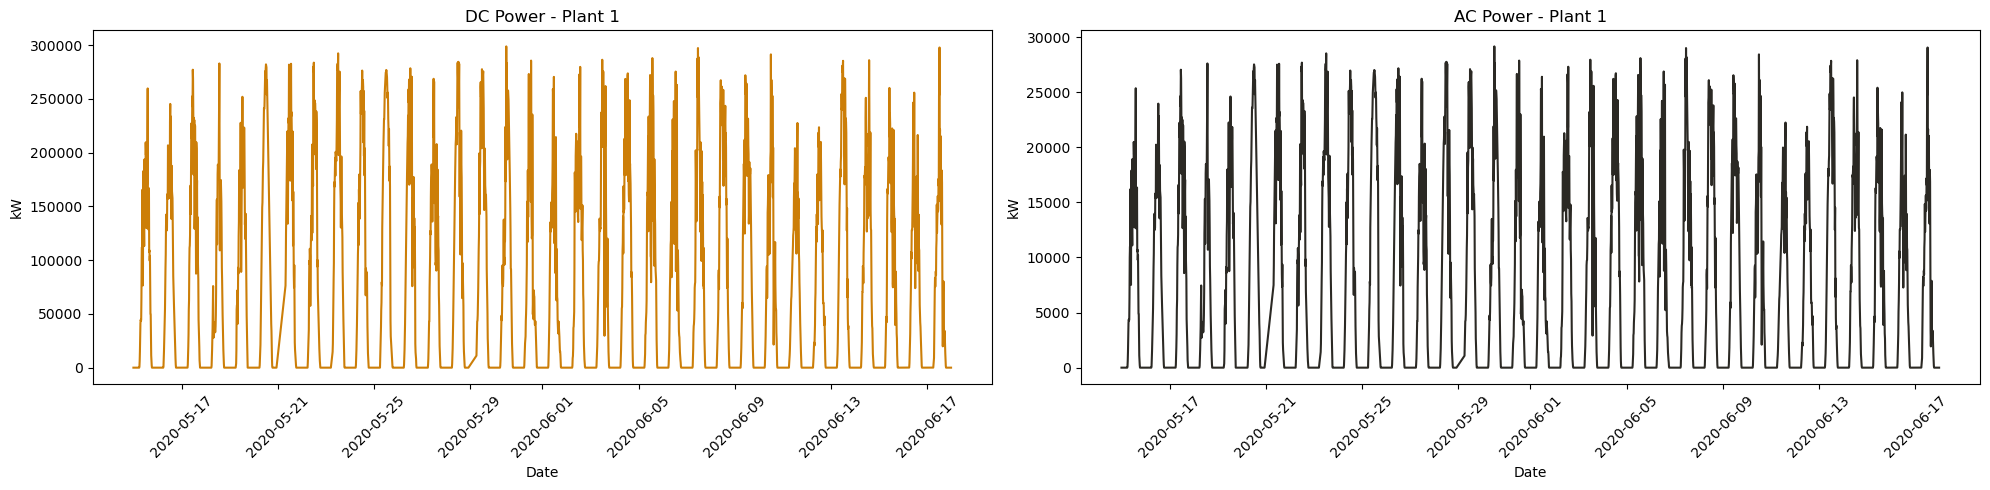

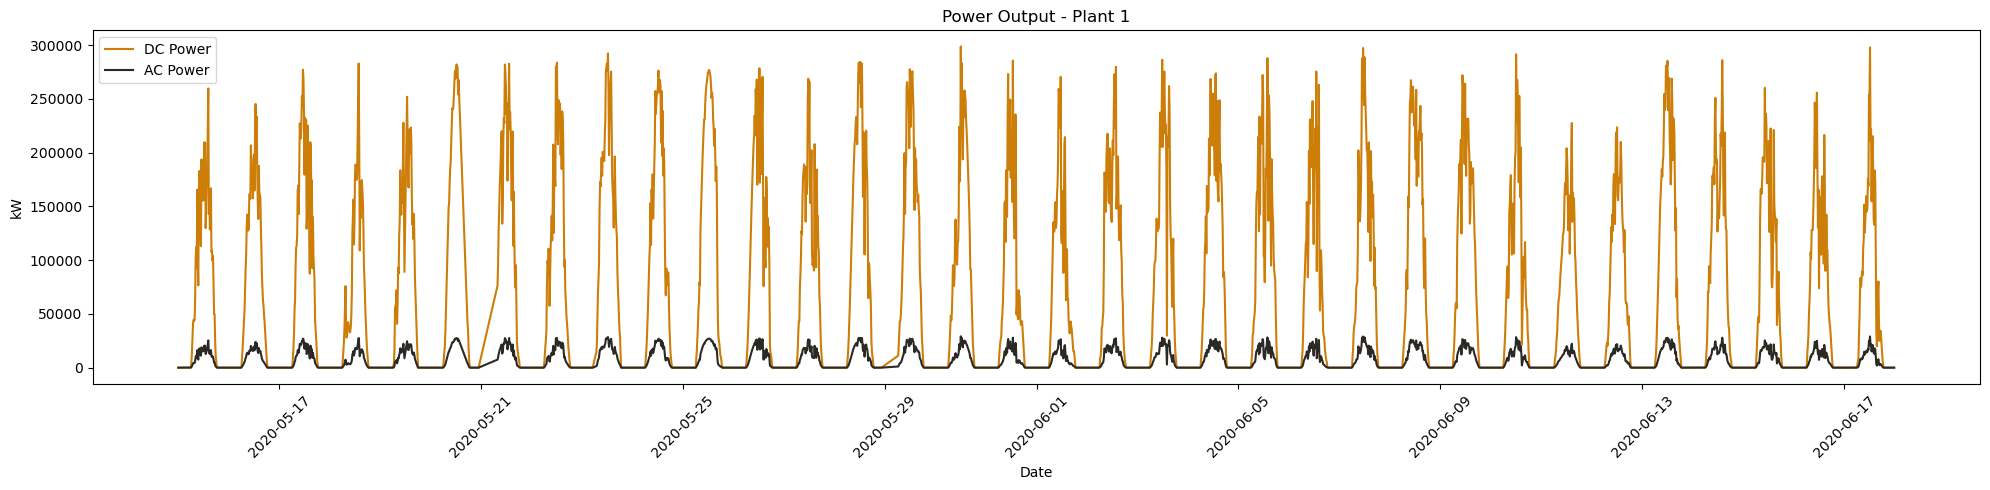

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))


axs[0].plot(g1_idx['DATE_TIME'], g1_idx['DC_POWER'], color='#cc7e08')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('kW')
axs[0].set_title('DC Power - Plant 1')
axs[0].tick_params(axis='x', rotation=45)


axs[1].plot(g1_idx['DATE_TIME'], g1_idx['AC_POWER'], color='#2b2924')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('kW')
axs[1].set_title('AC Power - Plant 1')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(g1_idx['DATE_TIME'], g1_idx['DC_POWER'], color='#cc7e08', label='DC Power')
plt.plot(g1_idx['DATE_TIME'], g1_idx['AC_POWER'], color='#2b2924', label='AC Power')
plt.xlabel('Date')
plt.ylabel('kW')
plt.title('Power Output - Plant 1')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<div style="border-radius: 40px;
            color: #403b34;
            background-color: #bdbebf;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
    <ul style="margin-top: 0;">
        <li>in power generation dataset of Plant 1 there appears to be a significant disparity between the AC power and DC power readings, suggesting a potential factor of <u>10 discrepancy</u> in the recorded values for DC power </li>
        </ul>
</div>

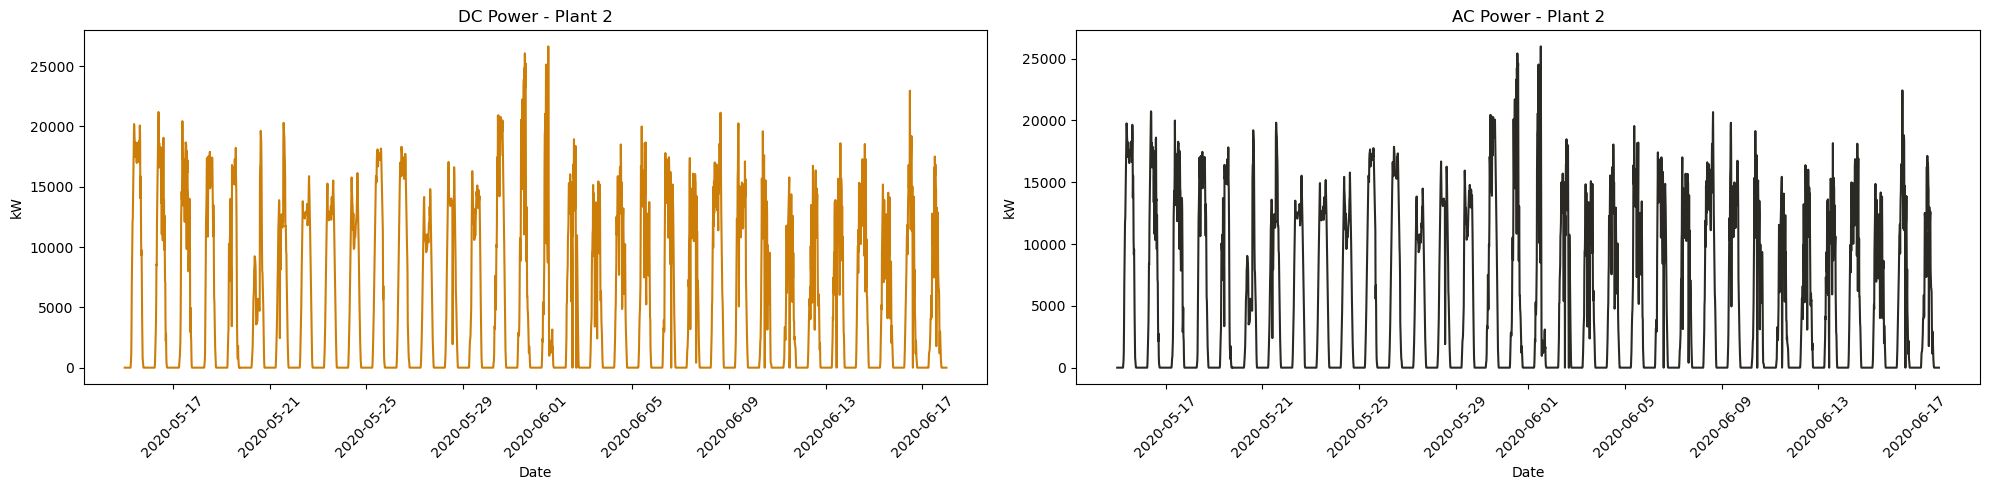

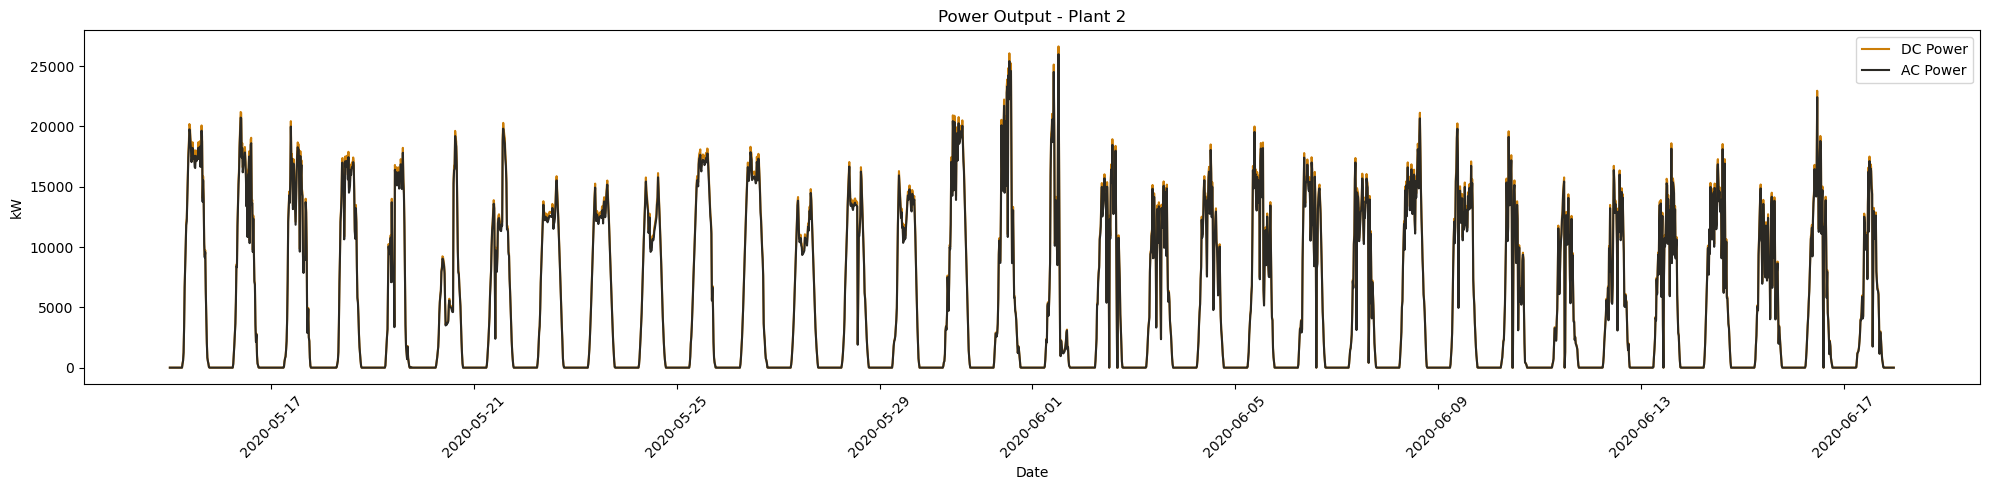

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))


axs[0].plot(g2_idx['DATE_TIME'], g2_idx['DC_POWER'], color='#cc7e08')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('kW')
axs[0].set_title('DC Power - Plant 2')
axs[0].tick_params(axis='x', rotation=45)


axs[1].plot(g2_idx['DATE_TIME'], g2_idx['AC_POWER'], color='#2b2924')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('kW')
axs[1].set_title('AC Power - Plant 2')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(g2_idx['DATE_TIME'], g2_idx['DC_POWER'], color='#cc7e08', label='DC Power')
plt.plot(g2_idx['DATE_TIME'], g2_idx['AC_POWER'], color='#2b2924', label='AC Power')
plt.xlabel('Date')
plt.ylabel('kW')
plt.title('Power Output - Plant 2')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<div style="border-radius: 40px;
            color: #403b34;
            background-color: #bdbebf;
            font-size: 100%;
            text-align: left;
            padding: 20px;
            margin: 10px;
            box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <p style="margin-bottom: 10px; font-weight: bold;">Output Analysis:</p>
    <ul style="margin-top: 0;">
        <li>in power generation dataset of Plant 2 there isn't disparity between the AC power and DC power readings </li>
        </ul>
</div>

In [9]:
g1_idx["DC_POWER"] = g1_idx["DC_POWER"]/10

# Merging Generation Data
power_ds = pd.concat([g1_idx, g2_idx])

# Merging Sensor Data
sensor_ds = pd.concat([s1, s2])

ds = pd.merge(power_ds, sensor_ds, on=['DATE_TIME','PLANT_ID'])


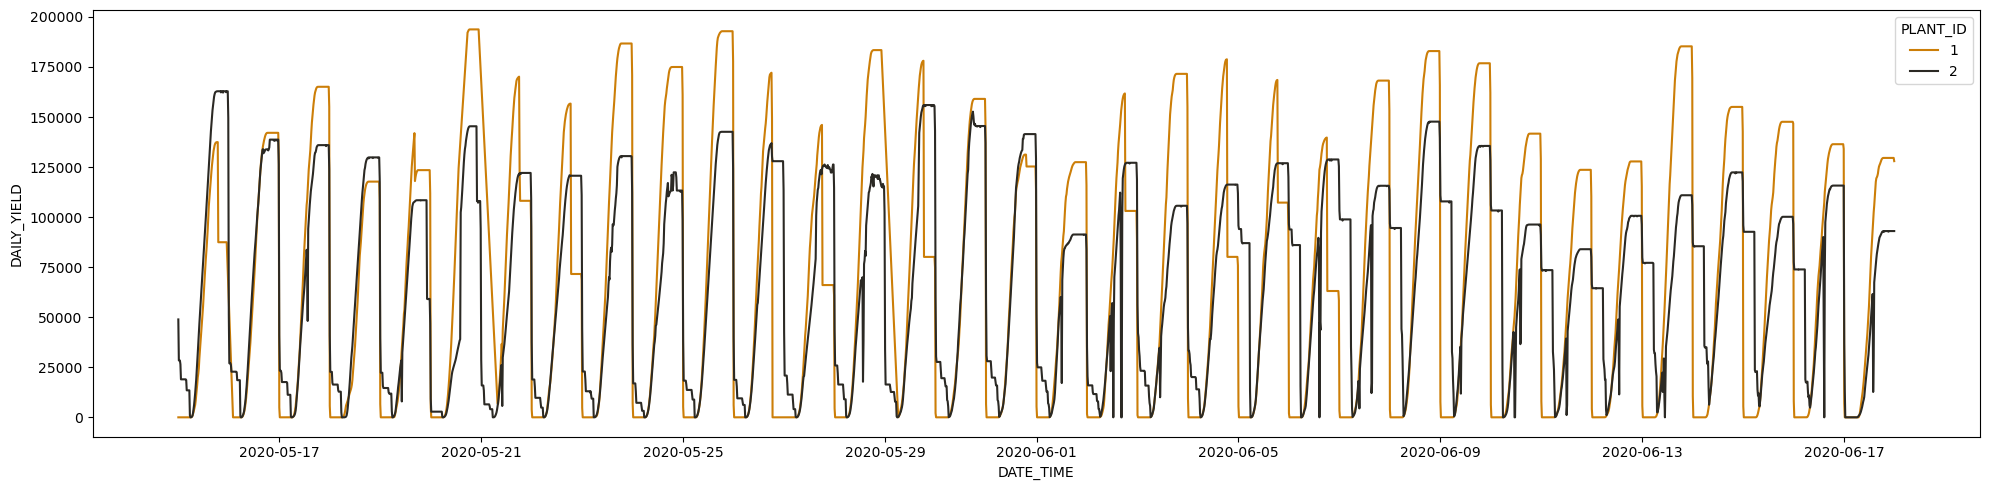

In [10]:
# plot Daiyly Yield against plants
plt.figure(figsize=(20, 5))
sns.lineplot(x="DATE_TIME", y="DAILY_YIELD",
             hue="PLANT_ID",
             palette=["#cc7e08", "#2b2924"],
             data=ds)
plt.tight_layout()

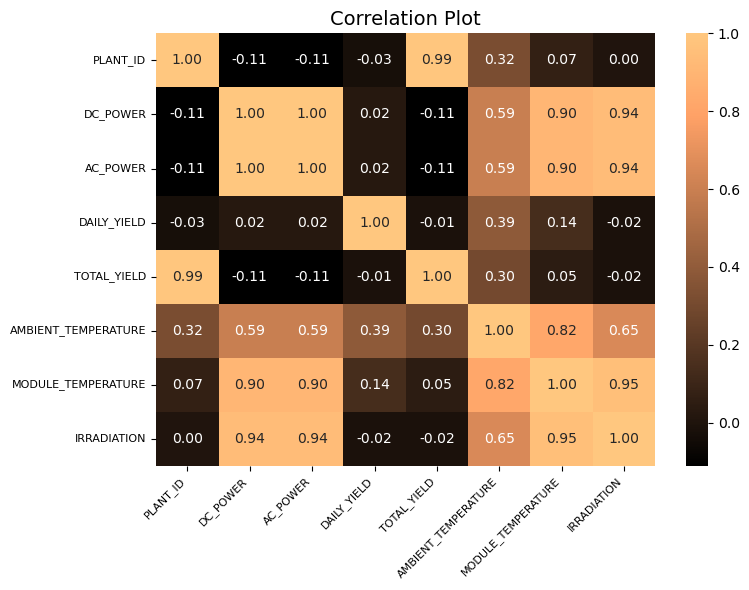

In [11]:
correlation_matrix = ds.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the correlogram using seaborn's pairplot function
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="copper", ax=ax)

# Customize the plot aesthetics
ax.set_title("Correlation Plot", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


<a id="5"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2b2924;font-family:newtimeroman;color:#cc7e08;font-size:160%;text-align:center;border-radius:10px 10px;">System Performance Analysis

<div style="border-radius:20px;
            border : black solid;
            color: #403b34;
            background-color: #cc7e08;
            font-size:100%;
            text-align: left;
            margin-left: 10px;
            margin-right: 10px;">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:#2b2924'><center> 
    </br> Conversion Efficiency
</center></h2>  
 
<ol style="margin-left:10px;margin-left:10px">
    
It provides an indication of how effectively the panels are converting sunlight into usable electricity. This can be calculated using the following formula:
</ol>

<ol style="margin-left:360px">
    <b>Conversion Efficiency = (AC Power / DC Power) * 100</b> 
</ol>

In [12]:
ConvEff_Plant1 = (sum(g1_idx['AC_POWER']) / (sum(g1_idx['DC_POWER']))) * 100

print("The Conversion Efficiency for Plant 1 is", round(ConvEff_Plant1, 3), "%")

The Conversion Efficiency for Plant 1 is 97.795 %


In [13]:
ConvEff_Plant2 = (sum(g2_idx['AC_POWER']) / sum(g2_idx['DC_POWER'])) * 100

print("The Conversion Efficiency for Plant 2 is", round(ConvEff_Plant2, 3), "%")

The Conversion Efficiency for Plant 2 is 97.801 %


In [14]:
ConvEff = (sum(ds['AC_POWER']) / (sum(ds['DC_POWER']))) * 100
ConvEff
print("The Conversion Efficiency for the System is", round(ConvEff, 3), "%")

The Conversion Efficiency for the System is 97.798 %


<div style="border-radius:20px;
            border : black solid;
            color: #403b34;
            background-color: #cc7e08;
            font-size:100%;
            text-align: left;
            margin-left: 10px;
            margin-right: 10px;">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:#2b2924'><center> 
    </br> Performance Ratio
</center></h2>  
 
<ol style="margin-left:10px;margin-left:10px">
    
Represents a metric used to assess the overall performance of a solar panel system and accounts for losses due to shading, soiling, temperature and other factors. It is calculated by dividing the actual energy output (AC power) by the expected energy output based on ideal conditions (irradiation and module temperature) as follows: 


</ol>

<ol style="margin-left:360px">
    <b>Performance Ratio = (AC Power / (Irradiation * Module Temperature)) * 100</b> 
</ol>


In [15]:
PerformanceRatio = (sum(power_ds['AC_POWER'])/( sum(sensor_ds['IRRADIATION'])*( sum(sensor_ds['MODULE_TEMPERATURE']))))*100

print("The Performance Ratio for the System is", round(PerformanceRatio, 3), "%")

The Performance Ratio for the System is 12.276 %
